In [1]:
from numpy import linspace as lsp
from numpy import insert as ins
from numpy import repeat as rep
from numpy import concatenate as cte
from numpy import random as ran

from scipy.signal import chirp, spectrogram, correlate
from matplotlib import pyplot as plt

In [2]:
ht = 10**-4; print(ht); l = 1500; up = 2*ht; t = lsp(0, up, l)

0.0001


In [3]:
fr0 = 1/ht; fr1 = 10/ht; s = chirp(t[0:int(l/2)], f0=fr0, f1=fr1, t1=ht, method='linear'); o = cte((s, rep([0], l/2)));
an = o + ran.default_rng().standard_normal(l)

In [4]:
c = correlate(an, s, mode='same')*2 / l
inc = int(l/2); m = t*100/ht; f0k = int(fr0/1000); f1k = int(fr1/1000);

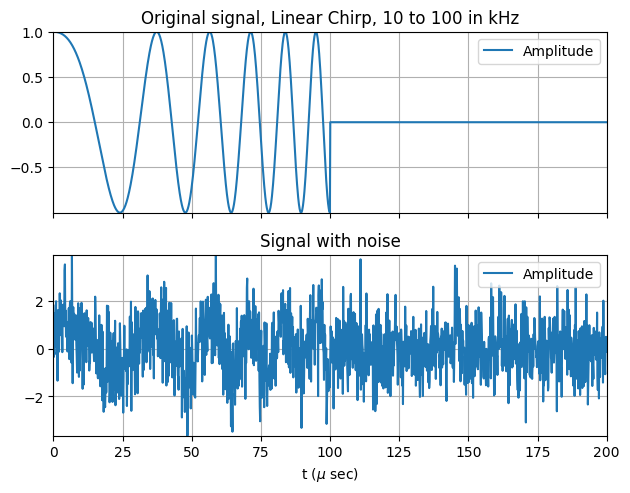

In [5]:
fig, (ax_orig, ax_noise) = plt.subplots(2, 1, sharex=True)
ax_orig.plot(m, o);
ax_orig.set_title(f'Original signal, Linear Chirp, {f0k} to {f1k} in kHz')
ax_orig.grid()
ax_orig.autoscale(enable=True, tight=True)
ax_orig.legend(['Amplitude'])

ax_noise.plot(m, an)
ax_noise.set_title('Signal with noise')
ax_noise.grid()
ax_noise.legend(['Amplitude'])
fig.tight_layout()
plt.xlabel('t ('r'$\mu$ sec)')
ax_noise.autoscale(enable=True, tight=True)
plt.ticklabel_format( axis='x')
plt.show()

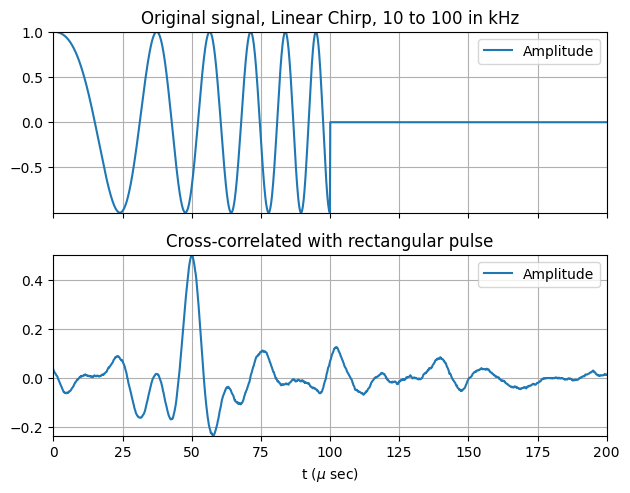

In [6]:
fig, (ax_orig, ax_c) = plt.subplots(2, 1, sharex=True)
ax_orig.plot(m, o); inc = int(l/2)
# .plot(sig) # ax_orig.plot(t[int(l/4)::inc], o[int(l/4)::inc], 'ro')
ax_orig.set_title(f'Original signal, Linear Chirp, {f0k} to {f1k} in kHz')
ax_orig.grid()
ax_orig.autoscale(enable=True, tight=True) # , axis='x'
ax_orig.legend(['Amplitude'])

ax_c.plot(m, c)
ax_c.grid() # ax_noise.axhline(int(l/8), ls=':')
ax_c.set_title('Cross-correlated with rectangular pulse') # ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.xlabel('t ('r'$\mu$ sec)')
ax_c.autoscale(enable=True, tight=True) # , axis='x'
plt.ticklabel_format(axis='x')
ax_c.legend(['Amplitude'])
plt.show()